# **I. GIỚI THIỆU**

- **Bài toán ở đây** là phân khúc khách hàng (Customer Segmentation) cho một công ty bán hàng (tạp hóa).
- **Mục tiêu**: Chia khách hàng thành các nhóm khác nhau dựa trên đặc điểm của họ để tối ưu hóa chiến lược kinh doanh.
- **Lợi ích**:
1.  Hiểu rõ từng nhóm khách hàng để đề xuất sản phẩm phù hợp.
2. Tùy chỉnh dịch vụ và chương trình khuyến mãi theo từng nhóm.
3. Cải thiện trải nghiệm khách hàng và tăng doanh thu.

## **1. VỀ DATASET**

- **Bối cảnh:**
  - Phân tích tính cách khách hàng là quá trình tìm hiểu chi tiết về các đặc điểm, hành vi và sở thích của từng nhóm khách hàng. Việc này giúp doanh nghiệp hiểu rõ hơn về khách hàng mục tiêu, từ đó dễ dàng điều chỉnh sản phẩm, dịch vụ và chiến lược tiếp thị sao cho phù hợp với nhu cầu thực tế.
  - Thay vì phân phối sản phẩm một cách đại trà, doanh nghiệp có thể sử dụng phân tích dữ liệu để xác định các phân khúc khách hàng có khả năng cao quan tâm hoặc mua sản phẩm. Điều này giúp tiết kiệm chi phí tiếp thị và tăng hiệu quả chiến dịch bằng cách tập trung nguồn lực vào đúng đối tượng khách hàng.

- **Nguồn dữ liệu:**
Bộ dữ liệu được cung cấp bởi Tiến sĩ Omar Romero-Hernandez và hiện đang được lưu trữ trên nền tảng Kaggle.

- **Ghi chú về độ tin cậy:**
Mặc dù bộ dữ liệu này rất phù hợp để thực hành các thuật toán phân cụm (clustering), nhưng do không có thông tin chi tiết về phương pháp thu thập nên độ tin cậy trong ứng dụng thực tế còn hạn chế. Tuy nhiên, nó vẫn là một ví dụ điển hình và hữu ích cho mục đích học tập và minh họa các phương pháp phân cụm dữ liệu khách hàng.

## **2. CÁC TRƯỜNG DỮ LIỆU (THUỘC TÍNH)**

- **People**
1. ID: Customer's unique identifier
2. Year_Birth: Customer's birth year
3. Education: Customer's education level
4. Marital_Status: Customer's marital status
5. Income: Customer's yearly household income
6. Kidhome: Number of children in customer's household
7. Teenhome: Number of teenagers in customer's household
8. Dt_Customer: Date of customer's enrollment with the company
9. Recency: Number of days since customer's last purchase
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise

- **Products**
11. MntWines: Amount spent on wine in last 2 years
12. MntFruits: Amount spent on fruits in last 2 years
13. MntMeatProducts: Amount spent on meat in last 2 years
14. MntFishProducts: Amount spent on fish in last 2 years
15. MntSweetProducts: Amount spent on sweets in last 2 years
16. MntGoldProds: Amount spent on gold in last 2 years

- **Promotion**
17. NumDealsPurchases: Number of purchases made with a discount
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

- **Place**
24. NumWebPurchases: Number of purchases made through the company’s website
25. NumCatalogPurchases: Number of purchases made using a catalogue
26. NumStorePurchases: Number of purchases made directly in stores
27. NumWebVisitsMonth: Number of visits to company’s website in the last month

# **II. IMPORT THƯ VIỆN**

In [ ]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


# **III. DOWNLOAD THE DATA**

In [ ]:
!pip install kaggle

Đăng nhập vào tài khoản Kaggle → vào phần "My Account": https://www.kaggle.com/account

Tại mục API, chọn Create New API Token → Tệp kaggle.json sẽ được tải về.

Tải tệp kaggle.json lên môi trường notebook (Colab hoặc Jupyter).

In [ ]:
from google.colab import files
files.upload()
import os
print(os.listdir())  # Hiển thị danh sách file trong thư mục hiện tại

Saving kaggle.json to kaggle.json
['.config', 'kaggle.json', 'sample_data']


Cấp quyền truy cập file

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Cấp quyền truy cập file

Tải và giải nén file dataset trên kaggle

In [ ]:
!kaggle datasets download -d imakash3011/customer-personality-analysis
!unzip customer-personality-analysis.zip -d dataset/

Dataset URL: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
License(s): CC0-1.0
Archive:  customer-personality-analysis.zip
  inflating: dataset/marketing_campaign.csv  


LOAD THE DATA

In [ ]:
import pandas as pd
data = pd.read_csv("dataset/marketing_campaign.csv", sep="\t")
print("Number of datapoints:", len(data))
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/marketing_campaign.csv'

# **IV. DATA CLEANING**

Đầu tiên ta coi bảng tóm tắt tổng quan về DataFrame


Lợi ích của bảng tóm tắt tổng quan về DataFrame:
1. Kiểm tra số lượng giá trị thiếu.
2. Xác định kiểu dữ liệu.
3. Có cái nhìn sơ bộ trước khi xử lý hoặc phân tích sâu hơn.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data["Dt_Customer"].head()

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014


- Nhìn tổng quan ta thấy được một vài điểm:
1. Có các giá trị bị thiếu trong cột income (thu nhập).
2. Cột Dt_Customer, biểu thị ngày khách hàng tham gia vào cơ sở dữ liệu, **chưa được chuyển đổi sang định dạng DateTime**.
3. Dữ liệu có một số thuộc tính phân loại (categorical), vì có các cột có kiểu dữ liệu object. Do đó, chúng ta cần mã hóa chúng thành dạng số sau này.


- **Trước tiên, đối với các giá trị bị thiếu, ta sẽ loại bỏ các dòng có giá trị bị thiếu trong cột income.**

In [ ]:
data = data.dropna()
print("Số datapoints còn lại sau khi xóa :",len(data))

Số datapoints còn lại sau khi xóa : 2216


## **1. Xem xét trùng lặp**

In [ ]:
data.duplicated().sum()

np.int64(0)

Tiếp đến ta coi quan sát lại cột Dt_Customer

Xem một vài giá trị của cột Dt_Customer để xác định định dạng ngày tháng, từ đó chuyển đổi sang datetime cho đúng định dạng

In [ ]:
data["Dt_Customer"]

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
...,...
2235,13-06-2013
2236,10-06-2014
2237,25-01-2014
2238,24-01-2014


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

Mục tiêu :Tính xem mỗi khách hàng đã gắn bó với công ty bao nhiêu ngày, tính từ ngày họ đăng ký đến ngày khách hàng mới nhất trong tập dữ liệu.

"Customer_For" là tên của đặc trưng mới sẽ được tạo ra, có thể là số ngày kể từ khi khách hàng bắt đầu mua sắm đến ngày cuối cùng có dữ liệu trong hệ thống.

In [ ]:
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

Bây giờ chúng ta sẽ khám phá các giá trị duy nhất trong các đặc trưng phân loại để có cái nhìn rõ ràng về dữ liệu.

In [ ]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


## **2. FEATURE ENGINEERING**

**Tạo thêm đặc trưng (feature engineering) là một trong những bước quan trọng nhất trong xử lý dữ liệu để giúp mô hình hiểu rõ hơn về các mẫu tiềm ẩn trong dữ liệu.**

Trong phần tiếp theo, tạo ra một số đặc trưng mới:
- Trích xuất "Age" của khách hàng từ "Year_Birth" (năm sinh của người tương ứng).
  - **Lý do : Vì sao làm điều này?** "Year_Birth"(năm sinh) chỉ là một mốc thời gian, còn tuổi là đặc trưng định lượng rõ ràng về giai đoạn cuộc sống của khách hàng. Ví dụ: Khách hàng 25 tuổi sẽ có hành vi tiêu dùng khác với người 60 tuổi nên rất hữu ích cho phân khúc.

- Tạo một đặc trưng khác "Spent" chỉ ra tổng số tiền chi tiêu của khách hàng trong các danh mục khác nhau trong khoảng thời gian hai năm.
  - **Vì sao?** Thay vì nhìn từng khoản chi nhỏ lẻ, việc tính tổng giúp thấy rõ giá trị kinh tế của từng khách hàng. Mô hình sẽ dễ nhận ra nhóm "chi tiêu cao", "chi tiêu trung bình", "chi tiêu thấp".

- Tạo một đặc trưng khác "Living_With" từ "Marital_Status" để xác định tình trạng sống của các cặp vợ chồng.
  - **Vì sao?** Không phải lúc nào cũng cần biết chính xác tình trạng kết hôn, mà cách sống (một mình hay sống cùng ai đó) mới là yếu tố ảnh hưởng đến hành vi tiêu dùng. Giúp đơn giản hóa và làm rõ tác động của gia đình đến hành vi.

- Tạo một đặc trưng "Children" để chỉ ra tổng số trẻ em trong một hộ gia đình, bao gồm cả trẻ em và thanh thiếu niên.
  - **Vì sao?** Thay vì phân biệt trẻ nhỏ và thiếu niên, ta chỉ cần biết số con trong nhà. Đây là đặc trưng có thể ảnh hưởng lớn đến loại sản phẩm mua và ngân sách.

- Để làm rõ hơn về hộ gia đình, tạo đặc trưng "Family_Size".
  - **Vì sao?** Giúp hiểu rõ quy mô gia đình, từ đó liên kết với mức chi tiêu, loại sản phẩm ưu tiên (hộ gia đình nhỏ sẽ khác hộ lớn).

- Tạo một đặc trưng "Is_Parent" để chỉ ra tình trạng làm cha mẹ.
  -  **Vì sao?** Một đặc trưng nhị phân đơn giản nhưng mạnh mẽ để mô hình dễ nhận biết tác động của việc có con cái đến hành vi.

- Cuối cùng, tôi sẽ tạo ba loại trong "Education" bằng cách đơn giản hóa số lượng giá trị của nó.
  - **Vì sao?** Loại bỏ sự phân mảnh trong dữ liệu danh mục → mô hình sẽ học tốt hơn. Không phải lúc nào độ chi tiết cao cũng hữu ích. Gom nhóm lại sẽ làm dữ liệu dễ hiểu hơn cho cả con người lẫn máy học.
- Loại bỏ một số đặc trưng thừa.
  - **Vì sao?** Tránh dư thừa thông tin, gây nhiễu cho mô hình. Làm dữ liệu gọn hơn, dễ trực quan hóa và giảm thời gian xử lý.

In [ ]:
#Age of customer today
data["Age"] = 2025-data["Year_Birth"]
#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]
#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]
#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)
#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

<ipython-input-15-4157327bd70c>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]


In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2.216000e+03,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,...,0.064079,0.013538,0.009477,0.150271,3.054423e+16,56.179603,607.075361,0.947202,2.592509,0.714350
std,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,...,0.244950,0.115588,0.096907,0.357417,1.749036e+16,11.985554,602.900476,0.749062,0.905722,0.451825
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,29.000000,5.000000,0.000000,1.000000,0.000000
25%,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.555200e+16,48.000000,69.000000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,55.000000,396.500000,1.000000,3.000000,1.000000
75%,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,66.000000,1048.000000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,132.000000,2525.000000,3.000000,5.000000,1.000000


- Các thống kê trên cho thấy một số sự sai lệch trong giá trị trung bình của Thu nhập và Tuổi, cũng như giá trị tối đa của Thu nhập và Tuổi.
- Lưu ý rằng tuổi tối đa là 132 năm, vì tính toán tuổi hiện tại (tức là năm 2025) và dữ liệu khá cũ.
- Cần xem xét cái nhìn tổng quan hơn về dữ liệu. vẽ đồ thị cho một số đặc trưng đã chọn.

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

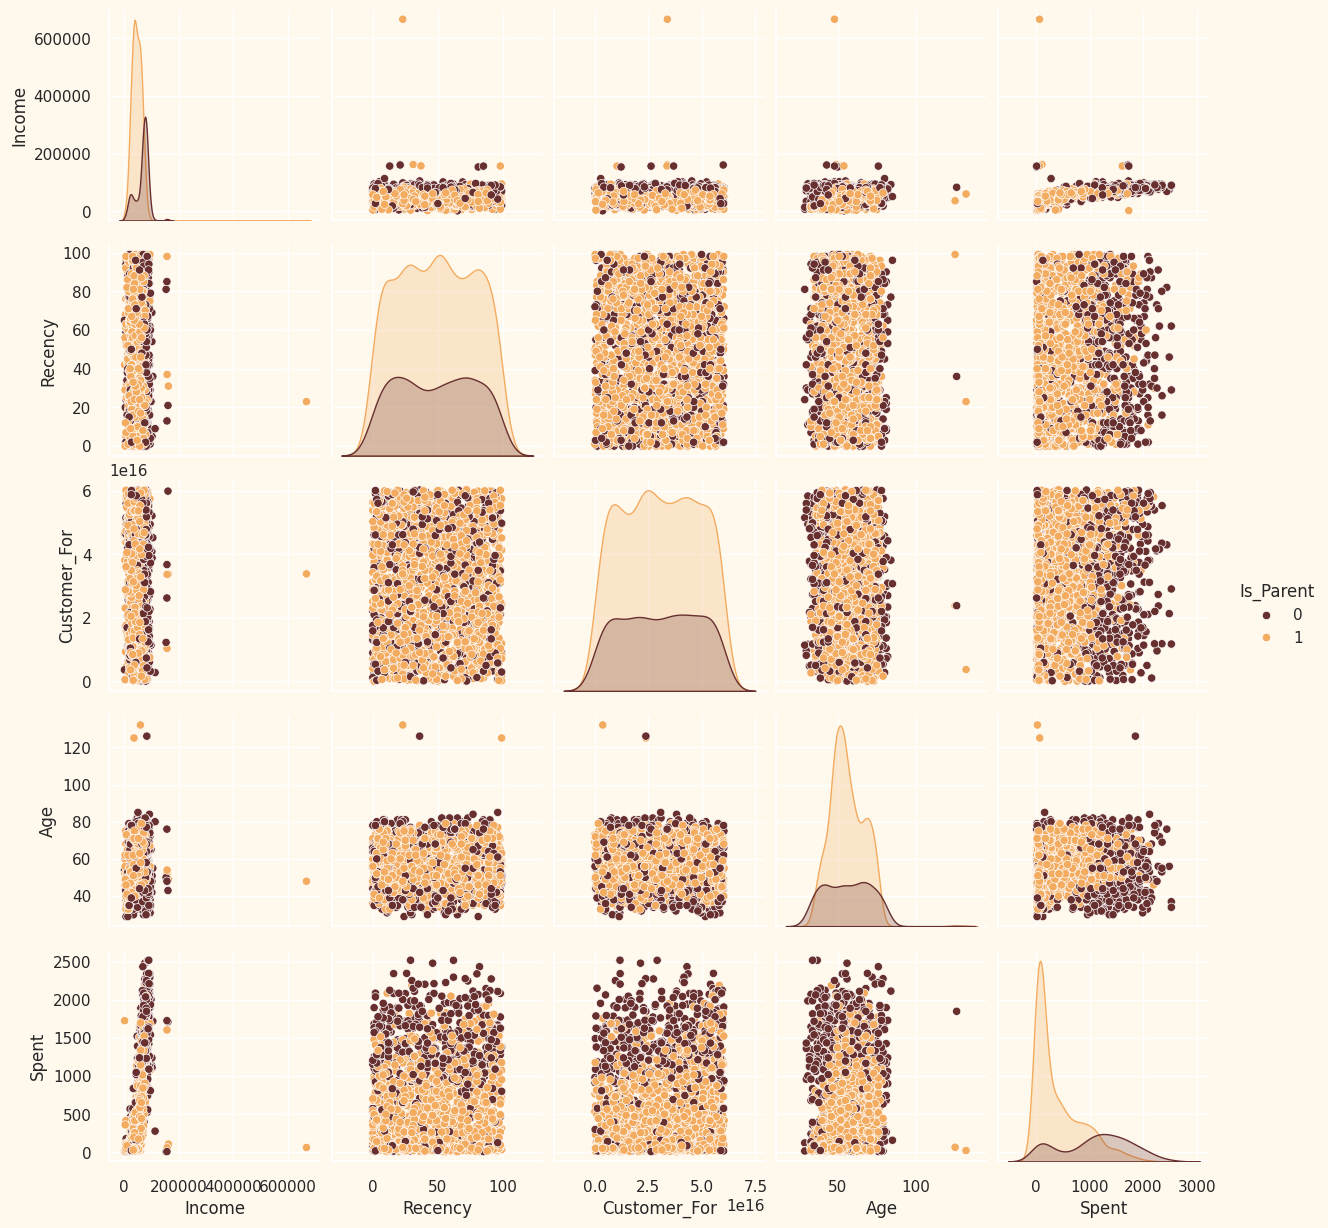

In [ ]:
#To plot some selected features
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue
plt.show()

có một vài giá trị ngoại lai trong các đặc trưng Thu nhập và Tuổi. Chúng ta sẽ xóa các giá trị ngoại lai trong dữ liệu.

In [ ]:
data = data[(data["Age"]<90)]
data = data[(data["Income"]<600000)]
print("Tổng số datapoints sau khi xóa các điểm outliers :", len(data))

Tổng số datapoints sau khi xóa các điểm outliers : 2212


# **V. DATA PREPROCESSING**

- Trong phần này, chúng ta sẽ tiến hành tiền xử lý dữ liệu để thực hiện các thao tác phân cụm.
- Các bước sau sẽ được áp dụng để tiền xử lý dữ liệu:
  1. Mã hóa nhãn cho các đặc trưng phân loại

  2. Chuẩn hóa các đặc trưng bằng cách sử dụng standard scaler

  3. Tạo một dataframe con cho việc giảm chiều dữ liệu

Đầu tiên encoder cho các đặc trưng phân loại

In [ ]:
# Kiểm tra các cột có kiểu dữ liệu là 'category'
category_columns = data.select_dtypes(include=['object']).columns
print("Các cột kiểu category:", category_columns)

Các cột kiểu category: Index(['Education', 'Living_With'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Khởi tạo LabelEncoder
LE = LabelEncoder()
# Lặp qua các cột có kiểu dữ liệu là object (phân loại)
for i in category_columns:
    data[i] = LE.fit_transform(data[i])
print("Tất cả features giờ đều là kiểu dữ liệu numerical")

Tất cả features giờ đều là kiểu dữ liệu numerical


In [ ]:
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
print("Đây là dataframe được sử dụng cho model")
scaled_ds.head()

Đây là dataframe được sử dụng cho model


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.893586,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.893586,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.893586,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.893586,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.571657,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


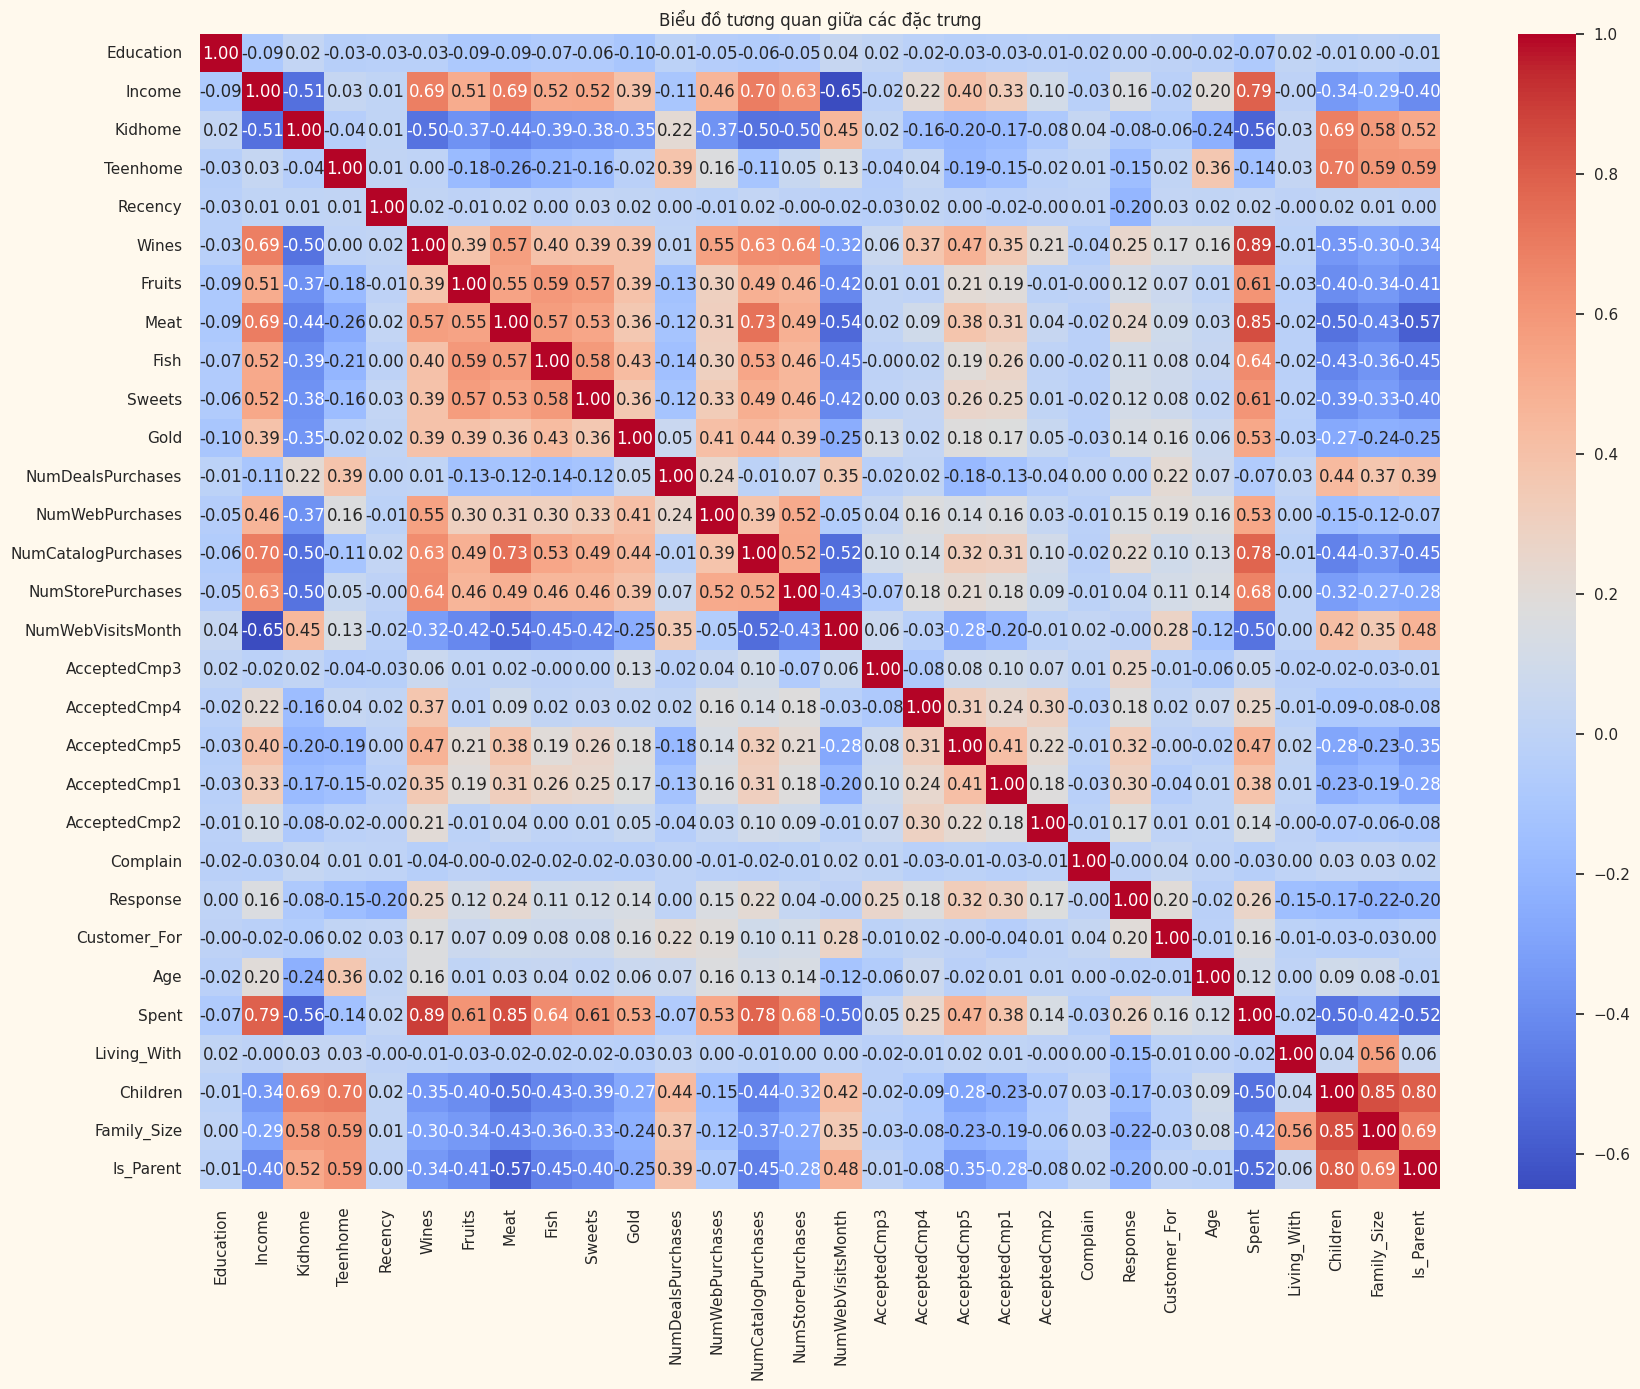

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Biểu đồ tương quan giữa các đặc trưng")
plt.show()

1.  Tập đặc trưng chi tiêu ví dụ như Wines, Fruits, Meat, Fish, Sweets, Gold có tương quan mạnh với nhau (nhiều giá trị từ 0.5 đến 0.9).
2. mối tương quan giữa Income và tập đặc trưng chi tiêu (Wines, Fruits, Meat, Fish, Sweets, Gold) cũng khá cao. Đơn giản vì khi thu nhập cao thì chi tiêu cao là điều hết sức bình thường và hợp lí
3. Age có mối tương quan cao với Kidhome: -0.68 ,Teenhome: -0.58, Children: -0.72, Is_Parent: -0.52. Vì càng lớn tuổi thì khả năng sinh con hay có con càng thấp , điều này cũng hợp lí.
4. Family_Size, Children, Is_Parent, Living_With lại có mối tương quan cao với nhau. Điều này có thể dẫn đến dư thừa thông tin có thể lược bớt tùy mục đích phân tích

# **VI. DIMENSIONALITY REDUCTION**

- Trong bài toán này, có nhiều yếu tố dựa trên đó việc phân loại cuối cùng sẽ được thực hiện. Những yếu tố này về cơ bản là các thuộc tính hoặc đặc trưng (features). Số lượng đặc trưng càng nhiều thì việc xử lý càng trở nên khó khăn. Nhiều đặc trưng trong số này có mối tương quan với nhau, do đó gây ra sự dư thừa. Vì lý do đó, tôi sẽ thực hiện giảm chiều dữ liệu trên các đặc trưng đã chọn trước khi đưa chúng vào bộ phân loại.

- Giảm chiều (Dimensionality reduction) là quá trình giảm số lượng biến ngẫu nhiên đang được xem xét bằng cách thu được một tập hợp các biến chính (principal variables).

- Phân tích thành phần chính (Principal Component Analysis - PCA) là một kỹ thuật dùng để giảm chiều của các tập dữ liệu như vậy, giúp tăng khả năng diễn giải trong khi vẫn tối thiểu hóa sự mất mát thông tin

## **1. Vấn đề ở đây vì sao lại dùng giảm chiều dữ liệu ?**

In [ ]:
so_cot = len(scaled_ds.columns)
print("Số cột:", so_cot)

Số cột: 23


- Trong bài toán phân cụm này, chúng ta đang làm việc với một tập dữ liệu có tới 23 đặc trưng – một số lượng khá lớn.

- Như biểu đồ tương quan đã thể hiện, nhiều đặc trưng trong số đó có mối tương quan cao với nhau, điều này làm tăng tính dư thừa trong dữ liệu.

- Các đặc trưng bị trùng lặp về thông tin như vậy không giúp ích nhiều cho mô hình học, mà còn gây ra sự phức tạp không cần thiết, đồng thời làm giảm hiệu quả phân cụm.

- Do đó, việc giảm chiều dữ liệu là một bước hợp lý để tăng tính khái quát, giảm nhiễu và tối ưu hóa hiệu suất thuật toán phân cụm (như KMeans, DBSCAN...).

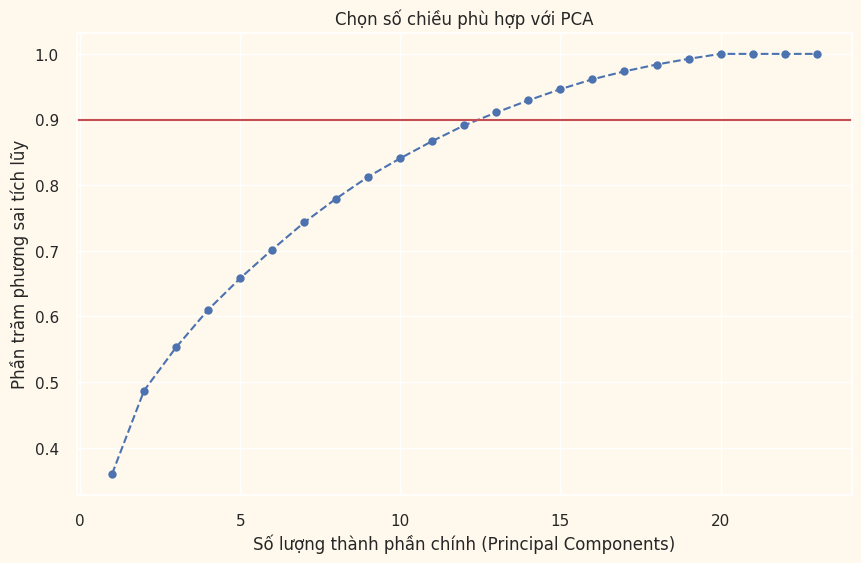

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_ds)
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_var_ratio)+1), cumulative_var_ratio, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-')  # đường tham chiếu 90% thông tin
plt.xlabel('Số lượng thành phần chính (Principal Components)')
plt.ylabel('Phần trăm phương sai tích lũy')
plt.title('Chọn số chiều phù hợp với PCA')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
# fit PCA để lấy thông tin phương sai
pca = PCA()
pca.fit(scaled_ds)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
# vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.plot(range(1, len(cumulative_var)+1), cumulative_var, marker='o', linestyle='--')
plt.axhline(y=0.90, color='r', linestyle='-', label='90% phương sai')
plt.axhline(y=0.80, color='g', linestyle=':', label='80% phương sai')
plt.xlabel('Số thành phần PCA')
plt.ylabel('Phần trăm phương sai tích lũy')
plt.title('Chọn số chiều phù hợp khi giảm chiều bằng PCA')
plt.grid(True)
plt.legend()
plt.show()

## **2. Chọn số chiều giảm xuống còn 3**

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds) # Huấn luyện mô hình PCA
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,5.781993e-17,2.878602,-5.978124,-2.539470,-0.781595,2.386380,7.452915
col2,2212.0,6.424437e-17,1.709469,-4.194757,-1.323929,-0.173721,1.234851,6.168189
col3,2212.0,1.244735e-17,1.231687,-3.625248,-0.853713,-0.050842,0.863974,6.750458


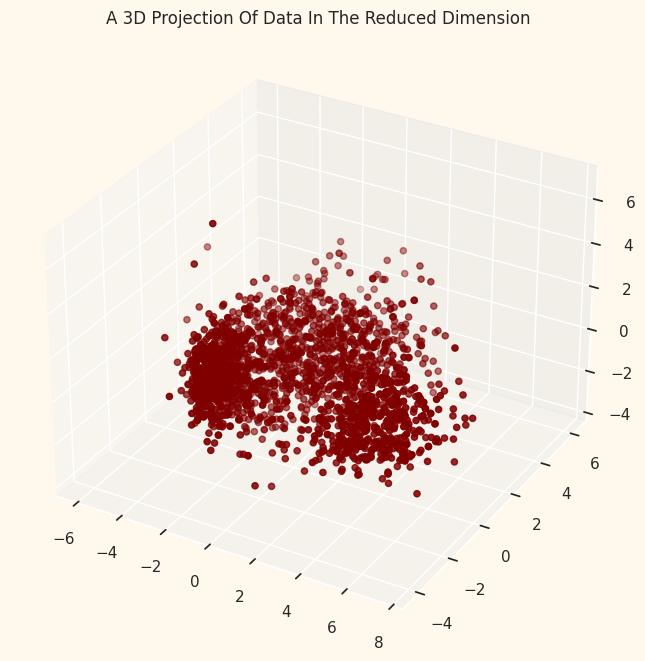

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Phân bố tổng thể:
- Dữ liệu tập trung chủ yếu trong một vùng lớn ở trung tâm của không gian 3D, với các điểm phân bố khá dày đặc.
- Có một số điểm lẻ tẻ nằm rải rác ở xa vùng trung tâm, nhưng số lượng rất ít so với vùng chính.

Mật độ:
- Vùng trung tâm có mật độ cao, với các điểm nằm rất gần nhau. Điều này cho thấy không có nhiều khoảng trống (vùng mật độ thấp) giữa các điểm trong khu vực này.
- Các điểm ở vùng ngoại vi (xa trung tâm) có mật độ thấp hơn, nhưng chúng không tạo thành các cụm riêng biệt rõ ràng mà chỉ là các điểm lẻ tẻ.

Hình dạng:
- Vùng trung tâm có hình dạng gần giống một khối cầu hoặc elip, nhưng không hoàn toàn đồng nhất. Có một số phần nhỏ (như vùng màu cam ở góc phải trên) có mật độ hơi khác biệt, nhưng vẫn nằm trong khu vực chính.

# **VII. MODELING**

## **Phân cụm là gì?**

Phân cụm dữ liệu là bài toán gom nhóm các đối tượng dữ liệu vào thánh từng cụm (cluster) sao cho các đối tượng trong cùng một cụm có sự tương đồng theo một tiêu chí nào đó.

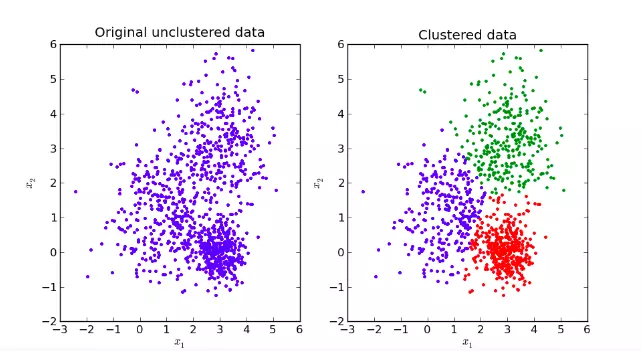

## **1. DBSCAN**

Khi biểu diễn các điểm dữ liệu trong không gian chúng ta sẽ thấy rằng thông thường các vùng không gian có mật độ cao sẽ xen kẽ bởi các vùng không gian có mật độ thấp. Nếu như phải dựa vào mật độ để phân chia thì khả năng rất cao những tâm cụm sẽ tập trung vào những vùng không gian có mật độ cao trong khi biên sẽ rơi vào những vùng không gian có mật độ thấp. Trong lớp các mô hình phân cụm của học không giám sát tồn tại một kĩ thuật phân cụm dựa trên mật độ (Density-Based Clustering), kĩ thuật này này đề cập đến các phương pháp học không giám sát nhằm xác định các cụm phân biệt trong phân phối của dữ liệu, dựa trên ý tưởng rằng một cụm trong không gian dữ liệu là một vùng có mật độ điểm cao được ngăn cách với các cụm khác bằng các vùng liền kề có mật độ điểm thấp .

DBSCAN là một thuật toán cơ sở để phân nhóm dựa trên mật độ. Nó có thể phát hiện ra các cụm có hình dạng và kích thước khác nhau từ một lượng lớn dữ liệu chứa nhiễu.

**Phân cụm không gian dựa trên mật độ có tính đến nhiễu (DBSCAN)**
1. Thuật toán phân cụm dựa trên mật độ không gian có tính đến nhiễu.
2. DBSCAN có thể tìm được các cụm không tuyến tính (không thể phân tách bằng đường thẳng). Cho phép tạo ra các cụm có hình thù tùy ý
3. Không phải tất cả các điểm đều được gán vào cụm. Các outliers sẽ không được gắn vào cụm
4. Không cần xác định trước số lượng cụm K.
5. DBSCAN có thể nhóm các điểm dữ liệu thành các hình dạng bất kỳ.
6. DBSCAN có khả năng chống chịu tốt với nhiễu.

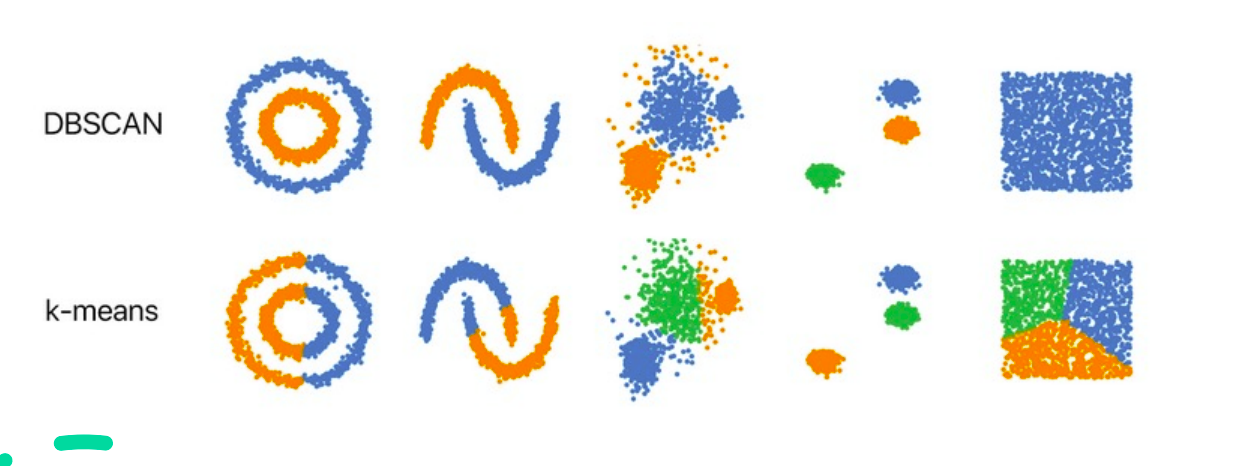

**ƯU ĐIỂM**
1. Tự động xác định số lượng cụm:
Không cần phải chỉ định trước số cụm như K-means.

2. Phát hiện được các cụm có hình dạng bất kỳ:
Không như K-means chỉ phát hiện cụm hình cầu, DBSCAN xử lý tốt các cụm dạng phi tuyến, phức tạp.

3. Chống nhiễu tốt:
DBSCAN có thể phân biệt điểm nhiễu (noise/outliers) nên phù hợp với dữ liệu thực có nhiễu.

4. Không phụ thuộc vào tâm cụm:
Không bị ảnh hưởng bởi tâm cụm như các thuật toán centroid-based.


**NHƯỢC ĐIỂM**
1. Khó chọn tham số tốt (ε và minPts):
Hai tham số này ảnh hưởng lớn đến kết quả phân cụm và khó xác định với dữ liệu phức tạp.

2. Không hoạt động tốt với dữ liệu có mật độ cụm không đồng đều:
Nếu một cụm có mật độ thưa hơn cụm khác, DBSCAN có thể coi cụm đó là nhiễu.

3. Hiệu năng không cao với dữ liệu lớn hoặc nhiều chiều (high-dimensional data):
Do phụ thuộc nhiều vào việc tính khoảng cách, nó có thể chậm với tập dữ liệu lớn hoặc nhiều chiều.

4. Không hoạt động tốt khi khoảng cách không đo được theo kiểu Euclidean:
Với dữ liệu không thể tính khoảng cách một cách hợp lý, DBSCAN không phát huy được sức mạnh.

### **CÁC BƯỚC CỦA THUẬT TOÁN DBSCAN:**

1. Đếm số lượng điểm lân cận của từng điểm trong dữ liệu. Nếu một điểm có ít nhất minPts điểm nằm trong bán kính eps quanh nó, thì điểm đó được gọi là core point.

2. Chọn ngẫu nhiên một core point chưa thuộc cụm nào.
- Nếu không còn core point nào chưa được gán cụm, thuật toán sẽ kết thúc. Nếu chọn được một core point, thì:
  - Gán nó vào một cụm mới.
  - Mở rộng cụm đó bằng cách tìm các điểm lân cận của nó:
    - Nếu những điểm đó cũng là core points, tiếp tục mở rộng thêm nữa.
- Nếu không phải core point nhưng là hàng xóm của core point, thì chỉ thêm vào cụm, không mở rộng tiếp.

3. Lặp lại quá trình mở rộng cho đến khi không thể thêm điểm nào vào cụm nữa.

4. Tăng số thứ tự cụm lên, rồi quay lại bước 2 để tìm thêm cụm mới. Những điểm không phải là core point và cũng không phải hàng xóm của core point nào sẽ được xem là outliers (nhiễu) và không được gán vào cụm nào cả.




### **Cách Chọn 2 tham số Epsilon và MinPts**

- **Epsilon (ε):**
Nó giống như bán kính của một cái vòng tròn vẽ quanh mỗi điểm dữ liệu.
  - Mình dùng vòng tròn này để xem xung quanh điểm đó có bao nhiêu điểm lân cận gần nó.
  - Nếu trong vòng tròn đó đủ đông người (đủ điểm gần đó), thì điểm đó được coi là trung tâm của một cụm (core point).
- **Cách chọn**:
  - Tính khoảng cách từ mỗi điểm đến vài người hàng xóm gần nó (gọi là k-distance).
  - Vẽ biểu đồ khoảng cách đó.
  - Nhìn chỗ biểu đồ gập lại (góc khuỷu - elbow), đó là giá trị epsilon nên chọn

- **minPoints (MinPts):**
  - Là số lượng điểm tối thiểu cần nằm trong vòng tròn (với bán kính là epsilon) để được tính là một cụm.
  - Nếu ít hơn số này thì không tạo cụm được.
  - Nếu bạn chọn minPoints là 1 thì mỗi điểm sẽ thành một cụm riêng → sai mục đích luôn 😅

- **Cách chọn:**
  - Nên ≥ số chiều dữ liệu + 1 hoặc số chiều * 2 + 1
  - Ví dụ: Dữ liệu có 2 chiều → chọn MinPts = 3 hoặc 4.
  - Dữ liệu nhiễu nhiều → chọn MinPts lớn hơn nữa.

Với epsilon quá nhỏ, mọi thứ đều trở thành nhiễu. Nhưng nếu epsilon quá lớn nó sẽ gom hết tất cả thành 1 cụm duy nhất

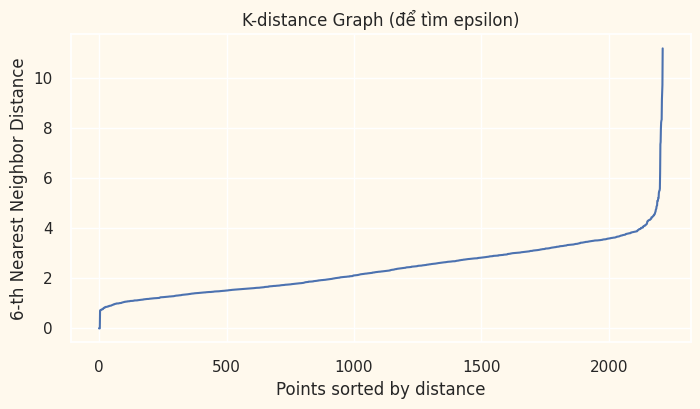

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
np.random.seed(42)
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(scaled_ds)
# Lấy khoảng cách từ mỗi điểm đến k hàng xóm gần nhất
distances, indices = neigh.kneighbors(scaled_ds)
# Lấy khoảng cách lớn nhất trong mỗi nhóm k hàng xóm
# vì khoảng cách hàng xóm gần nhất đứng đầu, nên lấy cột cuối (cột thứ k-1)
k_distances = distances[:, 3]
# Sắp xếp khoảng cách theo thứ tự tăng dần
k_distances = np.sort(k_distances)
# Vẽ biểu đồ K-distance để tìm "elbow"
plt.figure(figsize=(8, 4))
plt.plot(k_distances)
plt.title("K-distance Graph (để tìm epsilon)")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{6}-th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

Ở đây điểm gập mạnh hay khuỷu tay ở 4.2 nhưng ta sẽ chọn lớn hơn một chút để “bao” được cụm , nên là lấy 4.5
- Còn minPts thì lấy số chiều +1  ở đây đã giảm còn 3 chiều nên 3+1= 4

### **CÁC THAM SỐ CẦN QUAN TÂM TRONG DBSCAN**

**ĐỊNH NGHĨA THAM SỐ CHO DBSCAN**
1. ĐỊNH NGHĨA 2 THAM SỐ:
  - eps (epsilon):
Khoảng cách tối đa để xác định hàng xóm. Hai điểm được coi là neighbors nếu khoảng cách giữa chúng ≤ eps.
  - minPts (minimum points):
Số lượng điểm tối thiểu cần có trong vùng lân cận (bán kính eps) để một điểm được coi là core point.

2. ĐỊNH NGHĨA 1 KHÁI NIỆM:
  - Core point:
Một điểm được gọi là core point nếu có ít nhất minPts điểm (bao gồm cả chính nó) nằm trong vùng lân cận bán kính eps.

**Trong đó các tham số chính cần quan tâm đó là**
- **eps:** Chính là khoảng cách
 giúp xác định các điểm nằm trong vùng lân cận epsilon. Đây cũng là giá trị khó xác định nhất và tuỳ thuộc vào đặc trưng phân phối của mỗi bộ dữ liệu.

- **min_samples:** Số lượng tối thiểu các điểm láng giềng xung quanh một điểm để xác định một điểm lõi, số lượng này đã bao gồm điểm lõi. Tương đương với minPts+1 đã giới thiệu ở trên.

- **metric:** Hàm khoảng cách để đo lường khoảng cách giữa hai điểm bất kì, nhận mặc định là euclidean. Hàm khoảng cách và giá trị
 là hai tham số có mối quan hệ chặt chẽ và ảnh hưởng qua lại lẫn nhau và ảnh hưởng lên kết quả phân cụm.

- **algorithm:** Phương pháp được sử dụng để xác định các điểm láng giềng. Bao gồm các phương pháp auto, ball_tree, kd_tree, brute. Mặc định là auto. Về những phương pháp này bạn có thể tìm hiểu thêm tại sklearn.neighbors.

#### **Chi tiết một chút về algorithm**

- Trong DBSCAN, tham số algorithm quyết định phương pháp được sử dụng để tìm kiếm các điểm láng giềng (neighbors) trong không gian dữ liệu. Điều này rất quan trọng vì hiệu suất tính toán và tốc độ của thuật toán phụ thuộc nhiều vào cách các điểm láng giềng được xác định, đặc biệt khi làm việc với tập dữ liệu lớn.

1. **auto (Mặc định)**
- **Cách hoạt động:** Khi chọn auto, thư viện sẽ tự động quyết định phương pháp tối ưu dựa trên đặc điểm của dữ liệu và các tham số khác (như metric và kích thước tập dữ liệu). Nó sẽ ưu tiên thử các phương pháp dựa trên cây (tree-based) như ball_tree hoặc kd_tree, nhưng nếu không phù hợp, nó sẽ chuyển sang brute.
- **Ưu điểm:**
Tiện lợi vì không cần người dùng phải chọn thủ công.
Thường chọn được phương pháp hiệu quả trong hầu hết các trường hợp.
- **Nhược điểm:**
Không hoàn toàn minh bạch về phương pháp được chọn, có thể không tối ưu trong một số trường hợp đặc biệt.
- **Khi nào nên dùng:** Nếu bạn không chắc chắn về tập dữ liệu hoặc muốn thử nghiệm nhanh mà không cần tối ưu hóa chi tiết, như trong bài toán này chúng mình chỉ muốn thử nghiệm nhanh

2. **ball_tree**
- **Cách hoạt động:** Sử dụng cấu trúc dữ liệu "Ball Tree" để tổ chức các điểm trong không gian. Ball Tree chia không gian thành các "quả cầu" (hyperspheres) lồng nhau, giúp tìm kiếm các điểm láng giềng nhanh hơn so với kiểm tra toàn bộ tập dữ liệu.
- **Ưu điểm:**
Hiệu quả với dữ liệu có chiều cao (high-dimensional data).
Tốc độ tìm kiếm láng giềng nhanh hơn brute trong hầu hết các trường hợp, đặc biệt khi dữ liệu lớn.
- **Nhược điểm:**
Chi phí xây dựng cây ban đầu có thể cao với dữ liệu rất lớn hoặc phân phối không đồng đều.
Hiệu quả phụ thuộc vào cách dữ liệu được phân bố trong không gian.
- **Khi nào nên dùng:** Khi làm việc với dữ liệu đa chiều (nhiều đặc trưng) và muốn tối ưu hóa tốc độ mà không cần kiểm tra toàn bộ điểm.

3. **kd_tree**
- **Cách hoạt động:** Sử dụng cấu trúc dữ liệu "KD-Tree" (K-Dimensional Tree), một dạng cây nhị phân chia không gian thành các vùng hình chữ nhật dựa trên các trục tọa độ. KD-Tree đặc biệt hiệu quả khi dữ liệu có số chiều vừa phải.
- **Ưu điểm:**
Rất nhanh với dữ liệu có chiều thấp hoặc trung bình (thường dưới 20 chiều).
Tối ưu cho không gian Euclid (khi metric='euclidean').
- **Nhược điểm:**
Hiệu suất giảm mạnh khi số chiều tăng cao (gặp vấn đề "curse of dimensionality").
Không hoạt động tốt với các hàm khoảng cách khác ngoài Euclidean.
- **Khi nào nên dùng:** Khi dữ liệu của bạn có số chiều không quá lớn và bạn sử dụng khoảng cách Euclidean.

4. brute
- Cách hoạt động: Phương pháp "brute force" đơn giản nhất – kiểm tra khoảng cách từ một điểm đến tất cả các điểm khác trong tập dữ liệu để xác định láng giềng. Không sử dụng bất kỳ cấu trúc dữ liệu đặc biệt nào.
- Ưu điểm:
Đơn giản, dễ triển khai, và không phụ thuộc vào cấu trúc dữ liệu phức tạp.
Hoạt động tốt với mọi hàm khoảng cách (metric), không bị giới hạn như kd_tree.
Hiệu quả với tập dữ liệu rất nhỏ.
- Nhược điểm:
Độ phức tạp tính toán cao (O(n²)), khiến nó rất chậm với tập dữ liệu lớn.
- Khi nào nên dùng: Khi tập dữ liệu nhỏ hoặc khi bạn sử dụng một hàm khoảng cách không được hỗ trợ tốt bởi ball_tree hay kd_tree (ví dụ: khoảng cách cosine, Manhattan, v.v.).

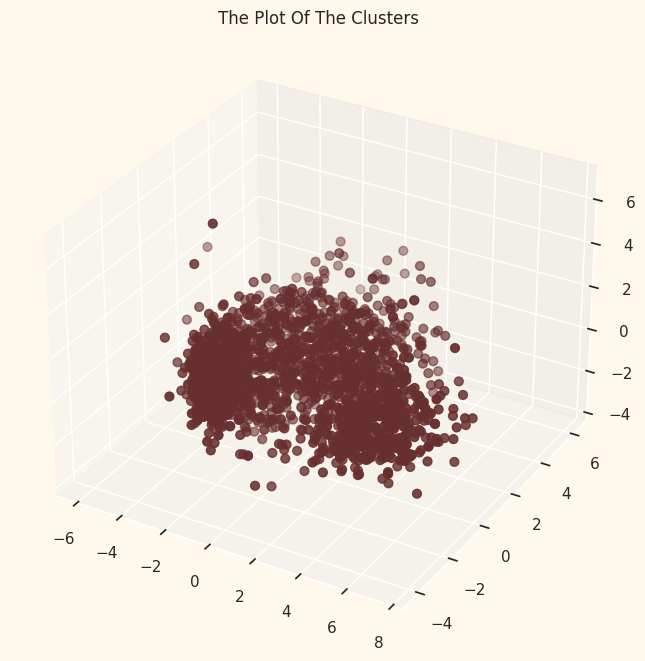

In [ ]:
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
np.random.seed(42)
# Khởi tạo mô hình DBSCAN (có thể điều chỉnh eps và min_samples tùy dữ liệu)
db = DBSCAN(eps=4.3, min_samples=5, metric='euclidean', algorithm='kd_tree')
# Huấn luyện mô hình và dự đoán nhãn cụm
yhat_DB = db.fit_predict(PCA_ds)
# Gán nhãn cụm vào PCA_ds
PCA_ds["Clusters"] = yhat_DB
# Gán nhãn cụm vào dataframe gốc
data["Clusters"] = yhat_DB
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')  # không cần label="bla"
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap=cmap)
ax.set_title("The Plot Of The Clusters")
plt.show()

Dữ liệu có một vùng trung tâm với mật độ cao và liên tục, không có khoảng trống rõ ràng để tách biệt các cụm.
Khi tăng Eps (epsilon) chỉ một chút, tất cả các điểm trong vùng trung tâm nhanh chóng hợp nhất thành một cụm duy nhất. Điều này xảy ra vì:
Các điểm trong vùng trung tâm nằm rất gần nhau, nên chỉ cần Eps tăng một chút, các điểm lân cận sẽ kết nối với nhau, tạo thành một chuỗi liên kết (chain) giữa các điểm.
DBSCAN hoạt động dựa trên mật độ: nếu không có vùng mật độ thấp để "cắt" giữa các cụm, toàn bộ vùng trung tâm sẽ trở thành một cụm lớn khi Eps đủ lớn để bao phủ khoảng cách giữa các điểm gần nhất.

Hoặc có thể vẫn chưa tìm được tham số epsilon và minPts hợp lí

In [ ]:
import numpy as np
labels = db.labels_  # hoặc yhat_DB nếu bạn đã đặt tên như vậy
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Số cụm tìm được: {n_clusters}")
print(f"Số điểm bị xem là nhiễu: {n_noise}")

Số cụm tìm được: 1
Số điểm bị xem là nhiễu: 0


<ipython-input-87-2f63248a592e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=data["Clusters"], palette= pal)
<ipython-input-87-2f63248a592e>:3: UserWarning: 
The palette list has fewer values (4) than needed (6) and will cycle, which may produce an uninterpretable plot.
  pl = sns.countplot(x=data["Clusters"], palette= pal)


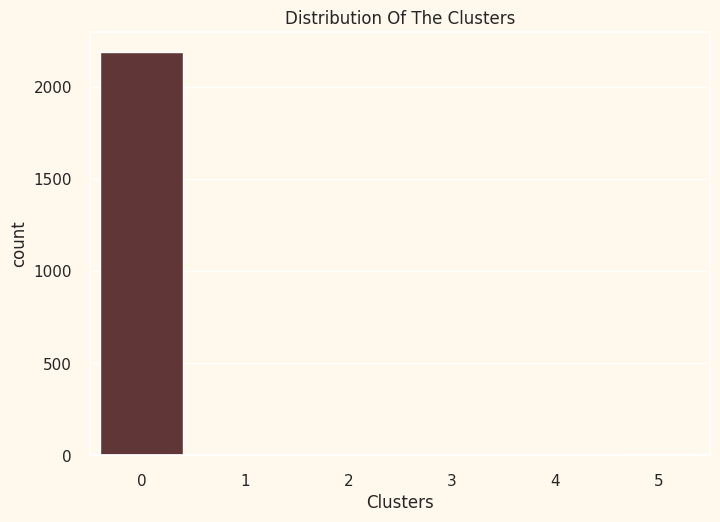

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-33-c573ce41e648>:1: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=yhat_DB, palette= pal)


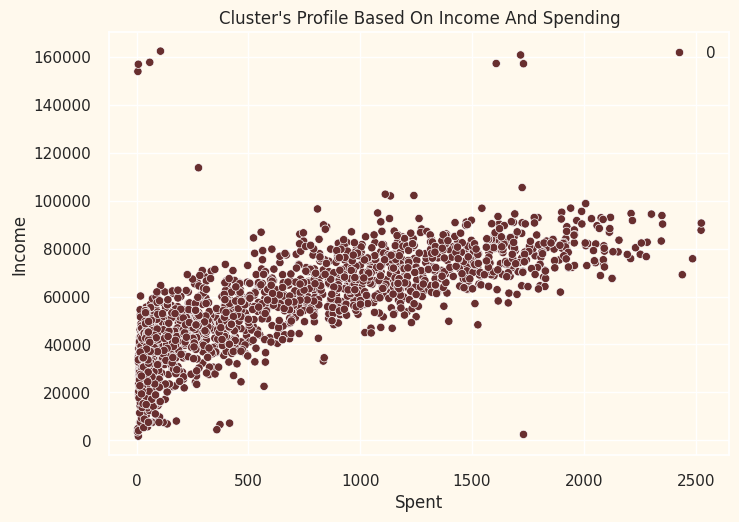

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=yhat_DB, palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## **2. KMEANS**

Trong thuật toán k-Means mỗi cụm dữ liệu được đặc trưng bởi một tâm (centroid). tâm là điểm đại diện nhất cho một cụm và có giá trị bằng trung bình của toàn bộ các quan sát nằm trong cụm. Chúng ta sẽ dựa vào khoảng cách từ mỗi quan sát tới các tâm để xác định nhãn cho chúng trùng thuộc về tâm gần nhất. Ban đầu thuật toán sẽ khởi tạo ngẫu nhiên một số lượng xác định trước tâm cụm. Sau đó tiến hành xác định nhãn cho từng điểm dữ liệu và tiếp tục cập nhật lại tâm cụm. Thuật toán sẽ dừng cho tới khi toàn bộ các điểm dữ liệu được phân về đúng cụm hoặc số lượt cập nhật tâm chạm ngưỡng.

### **Khái niệm K-means**

K-means là một thuật toán học máy không giám sát (unsupervised learning) được sử dụng để phân cụm dữ liệu. Mục tiêu của nó là chia tập hợp dữ liệu thành K cụm (clusters), trong đó mỗi điểm dữ liệu thuộc về cụm có trung tâm (centroid) gần nó nhất. Thuật toán này dựa trên việc tối ưu hóa khoảng cách giữa các điểm dữ liệu và trung tâm cụm, thường sử dụng khoảng cách Euclidea

### **Các loại KMEANS**

- K-means có một số biến thể để cải thiện hiệu suất hoặc phù hợp với các tình huống cụ thể:

1. K-means tiêu chuẩn: Phiên bản cơ bản nhất, khởi tạo ngẫu nhiên các centroid và lặp lại cho đến khi hội tụ.
2. K-means++: Cải tiến cách khởi tạo centroid bằng cách chọn các điểm khởi đầu sao cho chúng cách xa nhau, giúp tăng tốc độ hội tụ và cải thiện chất lượng cụm.
3. Mini-batch K-means: Sử dụng các lô dữ liệu nhỏ (mini-batches) thay vì toàn bộ tập dữ liệu để tính toán, phù hợp với dữ liệu lớn.
4. Fuzzy K-means: Một biến thể "mềm" (soft clustering), trong đó mỗi điểm dữ liệu có thể thuộc về nhiều cụm với mức độ thuộc về khác nhau (khác với K-means tiêu chuẩn là "cứng").

### **Nguyên lý hoạt động**

K-means hoạt động theo các bước sau:
1. Khởi tạo: Chọn K (số cụm) và khởi tạo K centroid (có thể ngẫu nhiên hoặc dùng K-means++).
2. Gán cụm: Mỗi điểm dữ liệu được gán vào cụm có centroid gần nhất (dựa trên khoảng cách Euclidean).
3. Cập nhật centroid: Tính lại trung tâm của mỗi cụm bằng cách lấy trung bình tọa độ của tất cả các điểm trong cụm đó.
4. Lặp lại: Quay lại bước 2 và 3 cho đến khi các centroid không thay đổi nữa (hội tụ) hoặc đạt số lần lặp tối đa.

### **TRƯỜNG HỢP SỬ DỤNG KMEANS**

- Dữ liệu có cấu trúc cụm rõ ràng, hình cầu (spherical) và kích thước cụm tương đối đồng đều.
- Số cụm K có thể ước lượng trước (dựa trên bài toán hoặc phân tích dữ liệu).
- Dữ liệu không có quá nhiều nhiễu (noise) hoặc giá trị ngoại lai (outliers), vì K-means nhạy cảm với outliers.
- Ví dụ ứng dụng: phân khúc khách hàng, nén ảnh, phân loại tài liệu.

sử dụng Elbow Method (phương pháp khuỷu tay) để xác định số lượng cụm tối ưu khi phân cụm dữ liệu bằng thuật toán K-means

Elbow Method to determine the number of clusters to be formed:


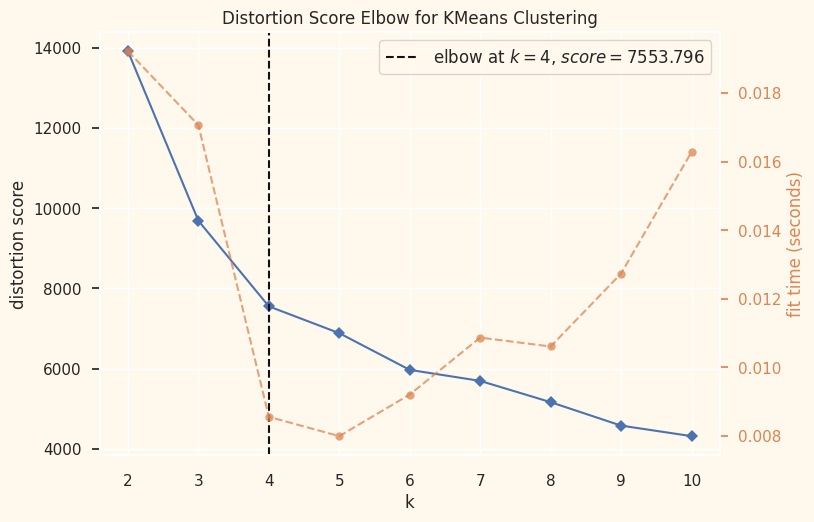

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Số cụm từ KMeans: 4


<ipython-input-51-1c7c3bd068ee>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=yhat_KM, palette= pal)


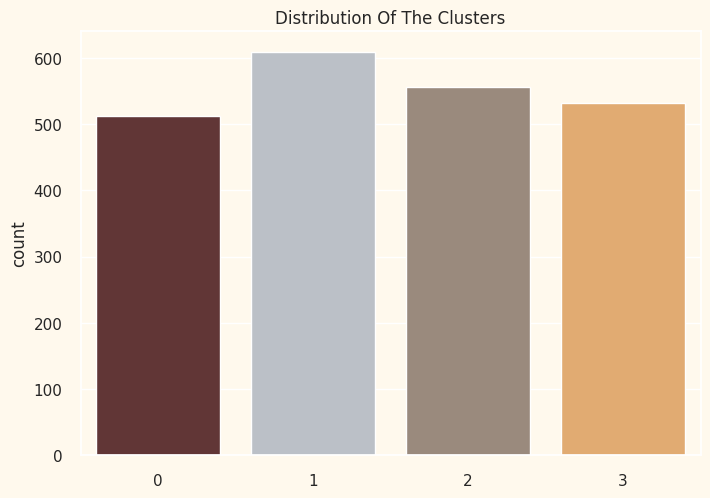

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
yhat_KM = kmeans.fit_predict(PCA_ds)
print(f"Số cụm từ KMeans: {len(set(yhat_KM))}")
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=yhat_KM, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

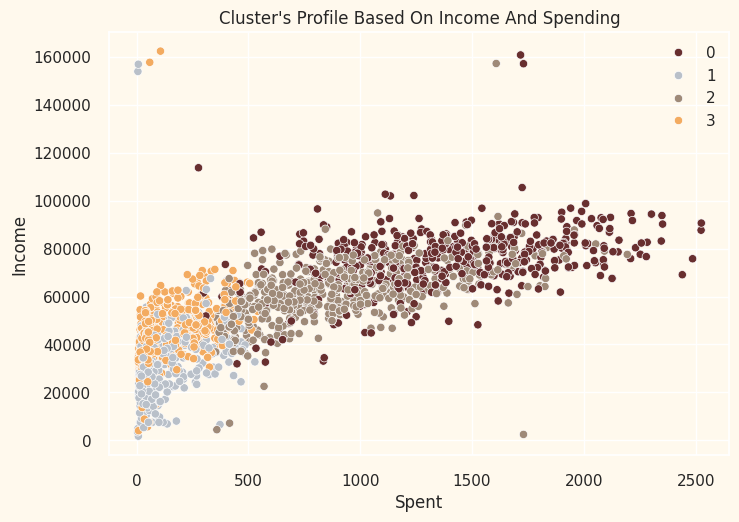

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=yhat_KM, palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

gồm 4 nhóm:
0. High spent và High income
1. Low spent và Low income
2. Low spent và average income
3. Low spent và High income

## **3. SPECTRAL CLUSTERING**

### **Khái niệm Spectral Clustering**

Spectral Clustering là một thuật toán phân cụm dựa trên lý thuyết đồ thị (graph theory) và phân tích phổ (spectral analysis). Thay vì sử dụng khoảng cách Euclidean trực tiếp như K-means, nó biến đổi dữ liệu thành một không gian mới bằng cách sử dụng các giá trị riêng (eigenvalues) và vector riêng (eigenvectors) của ma trận tương tự (similarity matrix), sau đó áp dụng một thuật toán phân cụm (thường là K-means) trong không gian này. Spectral Clustering đặc biệt hữu ích khi các cụm không có dạng hình cầu hoặc phân bố phức tạp.

### **Các loại Spectral Clustering**

Spectral Clustering không có nhiều biến thể chính thức như K-means, nhưng cách xây dựng ma trận tương tự và chuẩn hóa có thể tạo ra các phiên bản khác nhau:
1. Unnormalized Spectral Clustering: Sử dụng ma trận Laplacian không chuẩn hóa.
2. Normalized Spectral Clustering: Chuẩn hóa ma trận Laplacian, có hai loại phổ biến:
  - Shi-Malik (Lsym): Chuẩn hóa đối xứng.
  - Ng-Jordan-Weiss (Lrw): Chuẩn hóa ngẫu nhiên (random walk).
3. Kernel-based Spectral Clustering: Sử dụng kernel (như RBF) để tính ma trận tương tự, thay vì khoảng cách Euclidean.
- Trong thư viện scikit-learn, Spectral Clustering mặc định sử dụng chuẩn hóa kiểu Ng-Jordan-Weiss (Lrw).

### **Nguyên lý hoạt động**

Spectral Clustering hoạt động qua các bước sau:

1. Xây dựng ma trận tương tự (Affinity Matrix): Tính độ tương tự giữa các cặp điểm dữ liệu (thường dùng hàm Gaussian/RBF:
exp
⁡
(
−
𝛾
∥
𝑥
𝑖
−
𝑥
𝑗
∥
2
)
exp(−γ∥x
i
​
 −x
j
​
 ∥
2
 )).
2. Tạo ma trận Laplacian: Từ ma trận tương tự, xây dựng ma trận Laplacian (L = D - A, với D là ma trận bậc và A là ma trận tương tự).
3. Chuẩn hóa (nếu cần): Chuẩn hóa ma trận Laplacian để đảm bảo tính chất phổ tốt hơn.
Phân tích phổ: Tính
𝐾
K vector riêng tương ứng với
𝐾
K giá trị riêng nhỏ nhất (khác 0) của ma trận Laplacian.
4. Biến đổi dữ liệu: Chiếu dữ liệu vào không gian mới bằng các vector riêng này.
5. Phân cụm: Áp dụng K-means (hoặc thuật toán khác) trên dữ liệu đã biến đổi để phân cụm.

### **Ý NGHĨA CÁC THAM SỐ**

- **n_clusters:**	Số lượng cụm muốn chia
- **affinity:**	Cách tính độ tương tự giữa các điểm: 'rbf', 'nearest_neighbors', 'precomputed', v.v.
- **gamma:**	Hệ số trong kernel RBF (chỉ dùng nếu affinity='rbf')
- **assign_labels:**	Cách gán nhãn sau khi tính xong - eigenvectors: 'kmeans' (phổ biến), 'discretize'
- **n_neighbors:**	Số lượng hàng xóm nếu dùng affinity='nearest_neighbors'
- random_state:	Để kết quả tái lập được

In [ ]:
from sklearn.cluster import SpectralClustering

clustering = SpectralClustering(
    n_clusters=3,
    affinity='rbf',           # hoặc 'nearest_neighbors'
    assign_labels='kmeans',   # hoặc 'discretize'
    random_state=42
)
labels_sp = clustering.fit_predict(scaled_ds)

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 1053 with accuracies 
[1.91187993e-15 2.21503738e-05 3.35882558e-05 3.17765431e-05]
not reaching the requested tolerance 3.2961368560791016e-05.
Use iteration 981 instead with accuracy 
2.1672336668298354e-05.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.74594592e-15 2.18119023e-05 3.00751785e-05 3.48022650e-05]
not reaching the requested tolerance 3.2961368560791016e-05.
  _, diffusion_map = lobpcg(


<ipython-input-54-77798c333a33>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=labels_sp, palette= pal)
<ipython-input-54-77798c333a33>:2: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  pl = sns.countplot(x=labels_sp, palette= pal)


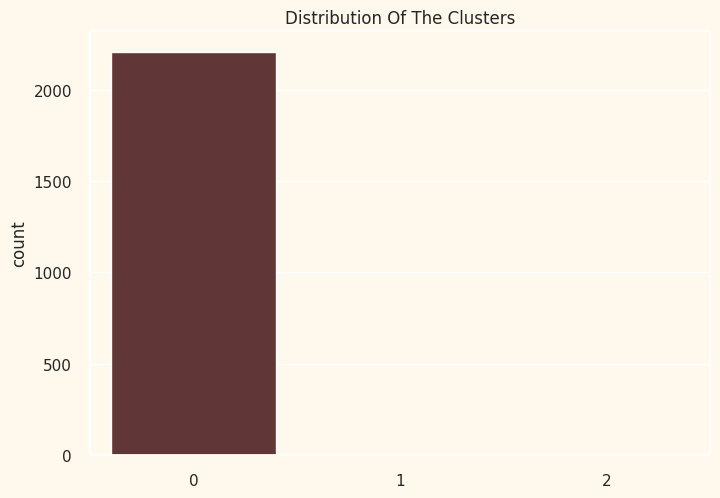

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=labels_sp, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

<ipython-input-55-85d7d85c8dd8>:1: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=labels_sp, palette= pal)


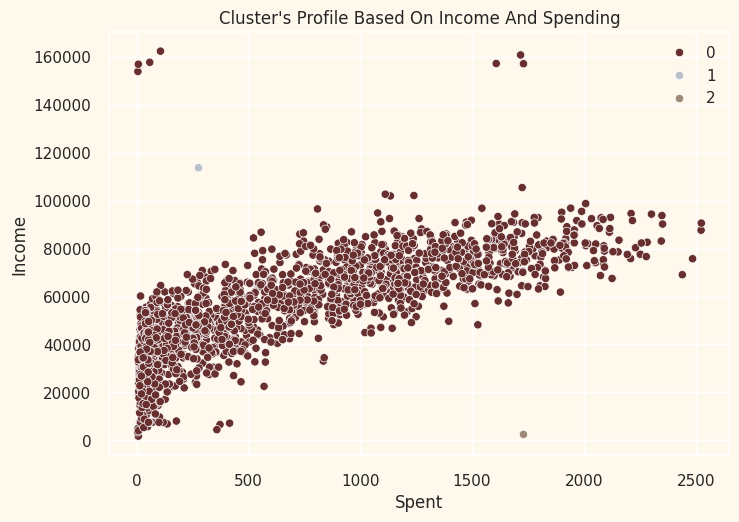

In [ ]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=labels_sp, palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# **VIII. EVALUATION**

Có một số phương pháp đánh giá phân cụm như sau:
1. Đánh giá trong (internal evaluation) là phương pháp đánh giá kết quả dựa trên chính dữ liệu được phân cụm bằng cách sử dụng các đại lượng đánh giá sự gắn kết của cụm như mật độ (density) , khoảng cách giữa các phần tử trong cụm hay khoảng cách giữa các cụm với nhau

2. Đánh giá ngoài (external evaluation) là phương pháp đánh giá kết quả dựa trên tập dữ liệu chuẩn (dữ liệu mẫu ) đã được phân cụm từ trước đó , còn gọi là tập benchmark.

3. đánh giá phân cụm bằng cách so sánh với các kết quả phân cụm khác được sinh ra bởi cùng 1 thuật toán nhưng có các tham số đầu vào khác nhau

## **Silhouette Score**

Đây là một chỉ số đánh giá độ hợp lý của các cụm được phân chia. Silhouette score có giá trị trong khoảng từ -1 đến 1, trong đó:
- 1: Các điểm trong cụm rất gần nhau và các cụm khác biệt rõ ràng.

- 0: Các điểm nằm giữa hai cụm.

- -1: Các điểm có thể bị phân vào cụm khác.

Tham số:
  - **X**: Đây là dữ liệu đầu vào, thường là ma trận các đặc trưng của dữ liệu (mỗi dòng là một điểm dữ liệu, mỗi cột là một đặc trưng).
  - **labels**: Đây là nhãn của các cụm mà thuật toán phân cụm đã gán cho từng điểm. Nếu bạn đang sử dụng DBSCAN, điểm ngoại lệ có thể có nhãn là -1.

- Công thức tính Silhouette Score dựa trên hai giá trị:
  - a(i): Khoảng cách trung bình giữa điểm
𝑖
i và các điểm trong cùng một cụm.

  - b(i): Khoảng cách trung bình giữa điểm
𝑖
i và các điểm trong cụm gần nhất.

In [ ]:
from sklearn.metrics import silhouette_score
# Tính Silhouette Score
sil_score = silhouette_score(PCA_ds, yhat_KM)
# silhouette_dbscan = silhouette_score(PCA_ds, yhat_DB)
silhouette_sp = silhouette_score(PCA_ds,labels_sp )
# Đánh giá với DBSCAN (điểm -1 là điểm ngoại lệ, nên cần xử lý cho kèm theo)
print(f"Silhouette Score of Kmeans: {sil_score}")
# print(f"Silhouette Score of DBSCAN: {silhouette_dbscan}")
print(f"Silhouette Score of SPECTRAL CLUSTERING: {silhouette_sp}")

Silhouette Score of Kmeans: 0.3734546862137326
Silhouette Score of SPECTRAL CLUSTERING: -0.13392208445122686


Silhouette Score càng cao, phân cụm càng hợp lý. Cả hai mô hình đều có Silhouette Score khá thấp, nhưng KMeans có điểm số cao hơn (0.37 so với 0.03). Điều này cho thấy các cụm được phân ra bởi KMeans có sự phân tách tốt hơn so với DBSCAN. Với điểm số 0.37, KMeans vẫn chưa đạt mức tốt, nhưng rõ ràng phân cụm của nó hợp lý hơn so với DBSCAN, có Silhouette Score cực kỳ thấp, chỉ 0.03, cho thấy các cụm của DBSCAN không rõ ràng và có sự chồng lấn lớn giữa các điểm trong các cụm.

## **Davies-Bouldin Index**

Chỉ số Davies-Bouldin đánh giá sự phân tách giữa các cụm. Chỉ số này càng nhỏ thì các cụm càng được phân biệt tốt hơn. Thông thường, một chỉ số thấp hơn sẽ chỉ ra rằng các cụm có sự phân biệt rõ ràng hơn.

In [ ]:
from sklearn.metrics import davies_bouldin_score
# Đánh giá với KMeans
dbi_kmeans = davies_bouldin_score(PCA_ds, yhat_KM)
# Đánh giá với DBSCAN
dbi_dbscan = davies_bouldin_score(PCA_ds, yhat_DB)
dbi_sp = davies_bouldin_score(PCA_ds, labels_sp)
print(f"Davies-Bouldin Index of Kmeans: {dbi_kmeans}")
print(f"Davies-Bouldin Index of DBSCAN: {dbi_dbscan}")
print(f"Davies-Bouldin Index of SPECTRAL CLUSTERING: {dbi_sp}")

Davies-Bouldin Index of Kmeans: 1.0202072865867637
Davies-Bouldin Index of DBSCAN: 0.7189107548294633
Davies-Bouldin Index of SPECTRAL CLUSTERING: 0.9983406649964793


# **IX. INCLUSION**

## **DBSCAN**

DBSCAN là một thuật toán đơn giản và hiệu quả. Nó hoạt động dựa trên cách tiếp cận mật độ phân phối của dữ liệu. Ưu điểm của thuật toán đó là có thể tự động loại bỏ được các điểm dữ liệu nhiễu, hoạt động tốt đối với những dữ liệu có hình dạng phân phối đặc thù và có tốc độ tính toán nhanh. Tuy nhiên DBSCAN thường không hiệu quả đối với những dữ liệu có phân phối đều khắp nơi. Khi huấn luyện DBSCAN thì các tham số của mô hình như khoảng cách epsilon, số lượng điểm lân cận tối thiểu minPts và hàm khoảng cách là những tham số có ảnh hưởng rất lớn đối với kết quả phân cụm. Thực tế cho thấy thuật toán khá nhạy với tham số epsilon và minPts nên chúng ta cần phải lựa chọn tham số cho mô hình trước khi tiến hành xây dựng mô hình.

## **KMEANS**

- Thuật toán k-Means là phương pháp đơn giản và thường được áp dụng trong các bài toán phân cụm. Thuật toán này dựa trên khoảng cách để cập nhật lại nhãn cho các quan sát về tâm gần nhất và tâm cụm sau đó được tính theo trung bình của toàn bộ các quan sát bên trong cụm. Chúng ta cũng chứng minh được rằng thuật toán sẽ hội tụ sau hữu hạn bước.
- Tuy nhiên thuật k-Means vẫn là thuật toán tồn tại những hạn chế đó là cần phải xác định trước tâm cụm, vị trí tâm của cụm chịu sự phụ thuộc vào vị trí khởi tạo ban đầu của chúng, thuật toán cũng bị ảnh hưởng bởi outliers và sự khác biệt về đơn vị của biến đầu vào. Trong trường hợp các bộ dữ liệu có phân phối phức tạp và mất cân bằng thì thuật toán sẽ không phân cụm chính xác.

## **SPECTRAL CLUSTERING**

Spectral Clustering giúp chúng ta khắc phục hai vấn đề chính trong phân cụm: một là hình dạng của cụm và vấn đề khác là xác định tâm của cụm. Thuật toán K-mean thường giả định rằng các cụm là hình cầu hoặc tròn, dùng nhiều lần lặp để xác định tâm cụm và phân các điểm. Trong spectral clustering, các cụm không tuân theo một hình dạng hoặc khuôn mẫu cố định. Các điểm ở xa nhau nhưng được kết nối thuộc cùng một cụm và các điểm ít xa nhau hơn có thể thuộc các cụm khác nhau nếu chúng không được kết nối. Điều này có nghĩa là thuật toán có thể hiệu quả đối với dữ liệu có hình dạng và kích thước khác nhau.
Khi so sánh với các thuật toán khác, nó nhanh về mặt tính toán đối với các tập dữ liệu thưa thớt vài nghìn điểm dữ liệu mặc dù có thể tốn kém để tính toán cho các tập dữ liệu lớn vì các giá trị riêng và vector cần được tính toán và sau đó mới thực hiện phân cụm.

# **X. REFERENCE**

1. https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering
2. https://www.youtube.com/watch?v=B08yMWVGWpk
3. https://www.youtube.com/watch?v=fx-pAwYf4qQ
4. https://www.youtube.com/watch?v=I3Oo__t_mks
5. https://www.youtube.com/watch?v=_cLje7QCCYU&list=RDCMUC365cnQJJlXu9WO0o0bzEQw&index=7
6. https://www.youtube.com/watch?v=jyXF1_xsQJo&t=2431s
7. https://phamdinhkhanh.github.io/deepai-book/ch_ml/DBSCAN.html